# Matching algorithms
Stock markets, housing and labor markets, dating and so forth are examples of matching tasks. Let us take suppliers an buyers as an example. in a matching problem, our job is to match the supliers to buyers so that both sides/ either side are satisfied.    

Matching problems can be considered as network problems. In network terms, a matching is a subset of edges where every node in one group goes through only one node in the other group. There should be only one edge from each node.    

In [1]:
# Import networkx library and rename it as nx. 
import networkx as nx

# Other packages required
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Unweighted bipartite mapping 
Let us take a simple example of mapping students and dorm rooms. In this problem, students give a list of rooms they are willing to stay at. We represent students on side as nodes of a bipartite graph and rooms on the other side as nodes, and we put an edge between students and rooms as per this list.  

We want to map students and rooms. We want to identify  a subset where we match one student to exactly one other room (no roommates). The students give what rooms are acceptable, and many solutions are possible. Consider the below problem where we have students (A, B, C and D) and we want to match them to rooms (1,2,3,4). The list of acceptable rooms for each student is given below.

In [2]:
edgelist_df = pd.DataFrame({'node1':['A', 'A', 'B', 'B', 'C', 'C', 'D', 'D'], 'node2':[1,2,2,3,3,4,4,1]})
edgelist_df

,node1,node2
0,A,1
1,A,2
2,B,2
3,B,3
4,C,3
5,C,4
6,D,4
7,D,1


This can be represented as a bipartite graph as follows

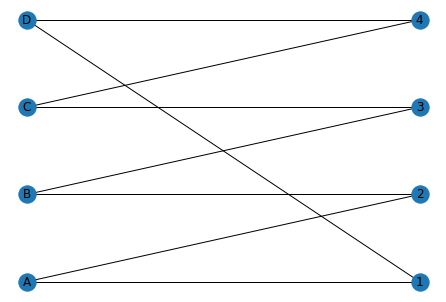

In [3]:
g = nx.Graph()
for i, elrow in edgelist_df.iterrows():
    g.add_edge(elrow[0], elrow[1])
    
# Make two sets in bipartite and get positions for the same
left, right = nx.bipartite.sets(g)

pos = {}
# Update position for node from each group
for i, node in enumerate(sorted(list(left))):
    g.add_node(node,pos=(0,i))
for i, node in enumerate(sorted(list(right))):
    g.add_node(node,pos=(1,i))

nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True)

Visually, we can find a couple of solutions, for example:  
-  A:1, B:2, C:3, D:4  
-  A:2, B:3, C:4, D:1  

In large graphs visual analysis might be difficult, and in such situations Halls theorem is useful to identify if matching is possible. 

### Halls theorem
But before Halls theorem, let us look at constricted set.   
**Constricted set**:  A constricted set is a subset of edges (on either side) whose neighbours are smaller than the subset. For examle, if we have two students (subset of students) who give only one room (same room) in the list, then the size of the students is 2 and the size of the rooms is one, and no matching can be done.  
Halls theorem states that for a mapping to exist, there should be no constricted set.  

**Augmenting paths**
1. Select any random matching of unmatched nodes.  
2. Switch to the augumented paths if it exists. If it doesnt exist, then we have a constricted set and we cannot do matching.    
3. Repeat until all left nodes are matched to one right node.  

This is implemented in NetworkX as follows:

In [29]:
# Select random edges
selected_edges = []
for left_node in left:
    # For a left node, select a random node in the right
    list_of_nodes = list(g.edges(left_node))
    random_node = np.random.randint(len(list_of_nodes))
    selected_edges.append(list_of_nodes[random_node]) 
selected_edges

[('D', 4), ('C', 4), ('A', 2), ('B', 3)]

Selected edges are shown in green

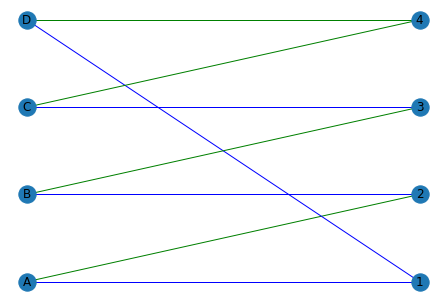

In [30]:
for edge in g.edges:
    if edge in selected_edges or (edge[1], edge[0]) in selected_edges:
        g.add_edge(edge[0],edge[1],color='g',weight=10)
    else:
        g.add_edge(edge[0],edge[1],color='b',weight=0.1)
nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True, 
        edge_color=nx.get_edge_attributes(g,'color').values())

We can see that this is not matching as node C and D are mapped to 4. This can be resolved by moving through the augumented paths for the C-4 node. For the C-4 node, moving thru the augumented path selects the C-3 and D-4 node. Following the smae process with with B-3 and A-3 nodes, we get: 

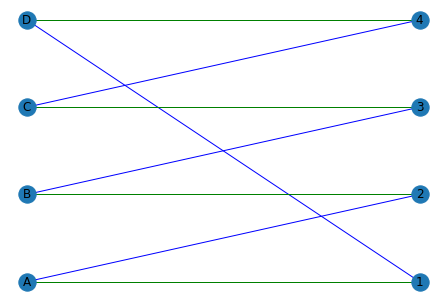

In [31]:
selected_edges = {(1,'A'), (2,'B'), (3, 'C'), (4,'D')}
for edge in g.edges:
    if edge in selected_edges or (edge[1], edge[0]) in selected_edges:
        g.add_edge(edge[0],edge[1],color='g',weight=10)
    else:
        g.add_edge(edge[0],edge[1],color='b',weight=0.1)
nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True, 
        edge_color=nx.get_edge_attributes(g,'color').values())

The final mapping is shwown in green

In [34]:
nx.algorithms.bipartite.matching.hopcroft_karp_matching(g, top_nodes = list(set(edgelist_df.node1)))

{'D': 4, 'C': 3, 'B': 2, 'A': 1, 1: 'A', 2: 'B', 3: 'C', 4: 'D'}

## Weighted bipartite mapping
In the previous problem, we tried to find a perfect maching in an unweighted graph. What if every edge in the graph has certain weight attached to it. The weights could be quality index (for student-dorm matching) or valuations in a market etc. Consider the suppliers-buyers example for a housing market as shown below. We have three suppliers, A, B and C and three buyers (x, y and z). The valuation for each of the sellers is also given. For example, buyer x values house A with 12, house B with 4 and house C with 2.

In [2]:
sellers = ['A', 'B', 'C']
buyers = ['x', 'y', 'z']
valuations_for_buyers = [[12, 4, 2], [8, 7, 6], [7, 5, 2]]
sellers_price = [0,0,0]

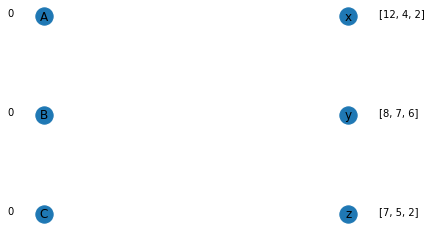

In [3]:
g = nx.Graph()
pos = {}
# Update position for node from each group
for i, node in enumerate(sellers):
    g.add_node(node,pos=(0,len(sellers)-i))
for i, node in enumerate(buyers):
    g.add_node(node,pos=(1,len(buyers)-i))
    
# Plot text for the buyers
for i, buyer in enumerate(buyers):
    plt.text(1.1,len(buyers)-i,s=valuations_for_buyers[i], horizontalalignment='left')

# Plot text for the sellers
for i, buyer in enumerate(buyers):
    plt.text(-0.1,len(buyers)-i,s=sellers_price[i], horizontalalignment='right')

nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True)

What we want to achieve is clearing of the market. Clearing happens when all houses are sold to one buyer, and every buyer bought one house. This can be done using an auction algorithm.  
1. Sellers quote a price    
2. Buyers calculate utility: Net valuation (payoff) = Gross Valuation - Price charged by seller  
3. Buyers select the object that has highest payoff  
4. If the market is not cleared, the sellers who have more than one offer (overdetermined) will increase the price by one unit, and the process is repeated.

In [8]:
# Function to pick the supplier with the maximumm utility
def match_to_maximum_utility(sellers, buyers, valuation, price):
    max_utility_sellers = {}
    for buyer_index in range(len(buyers)):
        max_utility = 0
        for seller_index in range(len(sellers)):
            if(max_utility < valuation[buyer_index][seller_index] - price[seller_index]):
                max_utility = valuation[buyer_index][seller_index]- price[seller_index]
                max_utility_sellers[buyers[buyer_index]] = [sellers[seller_index]]
            elif(max_utility == valuation[buyer_index][seller_index] - price[seller_index]):
                max_utility_sellers[buyers[buyer_index]].append(sellers[seller_index])
    return max_utility_sellers

Assuming that the initial price set by the seller is zero (scaled to zero - displayed beside the node), buyer *x* calculates the following utility:  
- For A: 12-0 = 12  
- For B: 4-0 = 4  
- For C: 2-0 = 2  
As the utility of A is the highest, *x* will chose A. Similarly, B and C will also choose A.

In [9]:
max_util = match_to_maximum_utility(sellers, buyers, valuations_for_buyers, sellers_price)
max_util

{'x': ['A'], 'y': ['A'], 'z': ['A']}

Plotting the selection, we see that A is overdetermined.

In [10]:
def plot_max_utility_graph(sellers, buyers, valuations_for_buyers, sellers_price, max_util):
    g = nx.Graph()
    pos = {}
    # Update position for node from each group
    for i, node in enumerate(sellers):
        g.add_node(node,pos=(0,len(sellers)-i))
    for i, node in enumerate(buyers):
        g.add_node(node,pos=(1,len(buyers)-i))
        
    # Make edges
    for key, values in max_util.items():
        for value in values:
            g.add_edge(key,value)

    # Plot text for the buyers
    for i, buyer in enumerate(buyers):
        plt.text(1.1,len(buyers)-i,s=valuations_for_buyers[i], horizontalalignment='left')

    # Plot text for the sellers
    for i, buyer in enumerate(buyers):
        plt.text(-0.1,len(buyers)-i,s=sellers_price[i], horizontalalignment='right')

    nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True)
    plt.show()

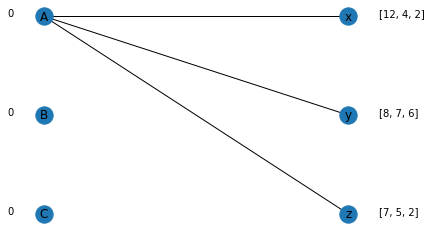

In [11]:
plot_max_utility_graph(sellers, buyers, valuations_for_buyers, sellers_price, max_util)

For the overdetermined edge A, we increase the price by one unit.

In [13]:
def get_overdetermined_edge_and_increase_price(sellers, sellers_price, max_util):
    from collections import Counter
    counts = dict(Counter(sum(max_util.values(), [])))
    over_determined_list = []
    for key, value in counts.items():
        if(value>1):
            over_determined_list.append(key)
            sellers_price[sellers.index(key)] += 1
    print('Nodes', over_determined_list, 'are over determined. Added 1 to the price for the suppliers')
    return counts

In [14]:
get_overdetermined_edge_and_increase_price(sellers, sellers_price, max_util)

Nodes ['A'] are over determined. Added 1 to the price for the suppliers


{'A': 3}

We then contiue this process until the market is cleared.

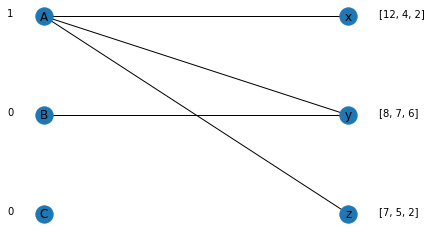

Nodes ['A'] are over determined. Added 1 to the price for the suppliers


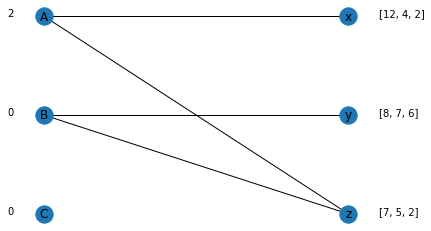

Nodes ['A', 'B'] are over determined. Added 1 to the price for the suppliers


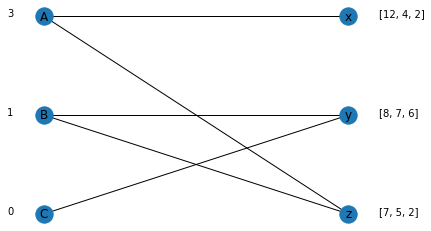

Nodes ['A', 'B'] are over determined. Added 1 to the price for the suppliers


In [15]:
no_of_sellers_selected = 0
while(no_of_sellers_selected != len(sellers)):
    max_util = match_to_maximum_utility(sellers, buyers, valuations_for_buyers, sellers_price)
    plot_max_utility_graph(sellers, buyers, valuations_for_buyers, sellers_price, max_util)
    counts = get_overdetermined_edge_and_increase_price(sellers, sellers_price, max_util)
    no_of_sellers_selected = len(counts) # need not always be the case, check    

We can see that for costs (A:3, B:1, C:0), the market can be cleared with buyer x choosing A, y choosing C and z choosing B. This is the maximum weight perfect matching.

## Matching with preferences
In the previous scenario, we had weights on the edges which indicated the utility. In this case we will look at matching where we have preferences in a ranked order. This is more natural way in many scenarios, like students preference to universities/universities selecting students, dating scenarios etc. This was originally implemented by Al Roth for matching hospitals and residency. Our goal is to clear the market, but also have a stable matching. So, what is a stable matching?  

**Stable matching**: Stability is an eqvilibrium when no pair on ether side has an incentive to devaite from the mapping. Let us understand this using an example.  

Take the dating scenario for example. On the left hand side we have men and on the right hand side we have women. All men rank women in strict order and all women rank men in strict order. In a stable matching, no pair of nodes (male-female) prefers each other to their curently assigned partners.    

### Gale Shapley Algorithm
Let us say that are *n* players on both sides with males(m) on one side and women(w) on another side. The algorithm is as follows:    
1. Every unmatched male (m) proposses to their first preference available.    
2. If the proposed women (w) is unmatched, w accepts. If the women is already matched and the m has higher preference for w, w switches. Else, previous mapping remains.  
3. This process continues until there is stability  

Lets take an example with three males and three females. The preferences are mentioned at the side of the node in a list. For example, m2 has a preference w2, followed by w3 and then w1. Similarly w2 has a preference of m3, followed by m1 and then m2.

In [19]:
males = ['m1', 'm2', 'm3']
females = ['w1', 'w2', 'w3']

male_preferences = [['w1', 'w2', 'w3'], ['w2', 'w3', 'w1'], ['w2', 'w3', 'w1']]
female_preferences = [['m2', 'm3', 'm1'], ['m3', 'm1', 'm2'], ['m1', 'm2', 'm3']]

In [20]:
def match_next_male(male_index, males, females, male_preferences, female_preferences):
    for female in male_preferences[male_index]:
        if(female not in current_mapping.values()):
            current_mapping[males[male_index]] = female
            return current_mapping
        elif(female in current_mapping.values()):
            current_mapping_inverse = dict(zip(current_mapping.values(),current_mapping.keys()))
            current_male_for_the_female = current_mapping_inverse[female]
            if(female_preferences[males.index(current_male_for_the_female)] > female_preferences[male_index]):
                current_mapping[males[male_index]] = female
                current_mapping.pop(current_male_for_the_female)
                return current_mapping

In [21]:
def plot_max_utility_graph(males, females, male_preferences, female_preferences, current_mapping):
    g = nx.Graph()
    pos = {}
    # Update position for node from each group
    for i, node in enumerate(males):
        g.add_node(node,pos=(0,len(males)-i))
    for i, node in enumerate(females):
        g.add_node(node,pos=(1,len(females)-i))
        
    # Make edges
    for key, value in current_mapping.items():
        g.add_edge(key,value)

    # Plot text for the males
    for i, male in enumerate(males):
        plt.text(-0.1,len(males)-i,s=male_preferences[i], horizontalalignment='right')

    # Plot text for the females
    for i, female in enumerate(females):
        plt.text(1.1,len(females)-i,s=female_preferences[i], horizontalalignment='left')

    nx.draw(g, pos=nx.get_node_attributes(g,'pos'), with_labels=True)
    plt.show()
    print('_____________________________________________________________________________')

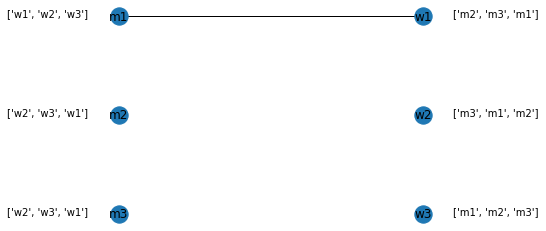

_____________________________________________________________________________


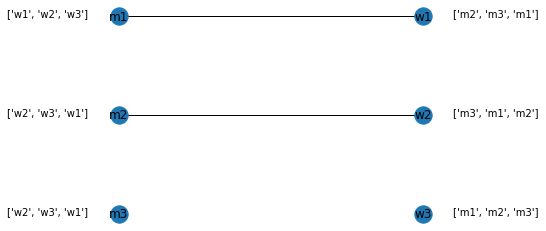

_____________________________________________________________________________


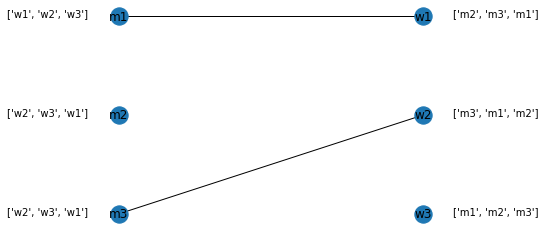

_____________________________________________________________________________


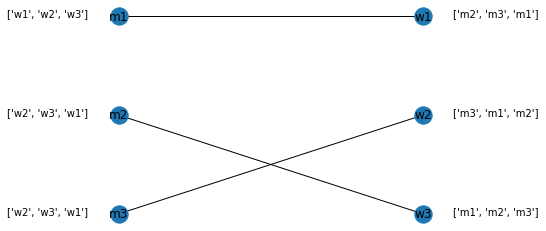

_____________________________________________________________________________


In [22]:
current_mapping = {}
while(len(current_mapping) != len(males)):
    for male_index in range(len(males)):
        if(current_mapping.get(males[male_index]) is None):
            current_mapping = match_next_male(male_index, males, females, male_preferences, female_preferences)
            plot_max_utility_graph(males, females, male_preferences, female_preferences, current_mapping)

The process goes on as follows:  
1. m1 proposes to w1 as w1 has maximum rank and as w1 is unselected, w1 accepts. We create an edge between them.      
2. m2 proposes to w2 as w2 has maximum rank, and as w2 is unselected, w2 accepts. We crreate a edge between them.    
3. m3 also proposes to w2. As w2 is already selected, it checks the preference of the current selection (m2) to m3. As m3 has better preference, w2 switches from m2 to m3. The edge between m2 and w2 is reoved and a new edge between m3 and w2 is created.  
4. m2 is currently unmapped, and selects the next best preference, which is w3. As w3 is unselected, w3 accepts.  
5. This clears the market and the process stops. This is stable mapping (from the men's side).  

These are the common matching techniques that exist.